In [ ]:
pip install minisom

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale

In [ ]:
democracy_index = pd.read_csv('dadosSP_2010mod.csv')
democracy_index.head()

In [31]:
category_color = {'Leste': 'darkgreen',
                  'Oeste': 'limegreen',
                  'Norte': 'darkorange',
                  'Sul': 'crimson',
                  'Centro': 'blue'}
colors_dict = {c: category_color[dm] for c, dm in zip(democracy_index.Bairro,
                                                      democracy_index.Zona)}
Bairro_codes = {'Aricanduva / Vila Formosa': 'Ari/For',
 'Butantã': 'Butantã',
 'Campo Limpo': 'CamLimpo',
 'Capela do Socorro': 'CapSocorro',
 'Casa Verde': 'CasaVerde',
 'Cidade Ademar': 'CidAdemar',
 'Cidade Tiradentes': 'CidTirad',
 'Ermelino Matarazzo': 'ErmeMatarz',
 'Freguesia do Ó / Brasilândia': 'FreÓBrasld',
 'Guaianases': 'Guaianases',
 'Ipiranga': 'Ipiranga',
 'Itaim Paulista': 'ItaPaulist',
 'Itaquera': 'Itaquera',
 'Jabaquara': 'Jabaquara',
 'Jaçanã / Tremembé': 'JaçaTrem',
 'Lapa': 'LP',
 'M’Boi Mirim': 'MboiM',
 'Mooca': 'MO',
 'Parelheiros': 'Parelheiros',
 'Penha': 'PE',
 'Perus': 'PU',
 'Pinheiros': 'Pinheiros',
 'Pirituba / Jaraguá': 'PiriJara',
 'Santana / Tucuruvi': 'SantTucu',
 'Santo Amaro': 'StAmaro',
 'São Mateus': 'SaoMateus',
 'São Miguel Paulista': 'SaoMigPau',
 'Sé': 'Sé',
 'Vila Mariana': 'VlMariana',
 'Vila Maria / Vila Guilherme': 'VMariaVGui',
 'Vila Prudente': 'VlPruded'}

In [38]:
feature_names = ['IDHM','IDHM Renda',	'IDHM Longevidade',	'IDHM Educação',
                 'Taxa de Crescimento',	'Densidade Populacional']

X = democracy_index[feature_names].values
X = scale(X)

size = 5
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8332836814643292


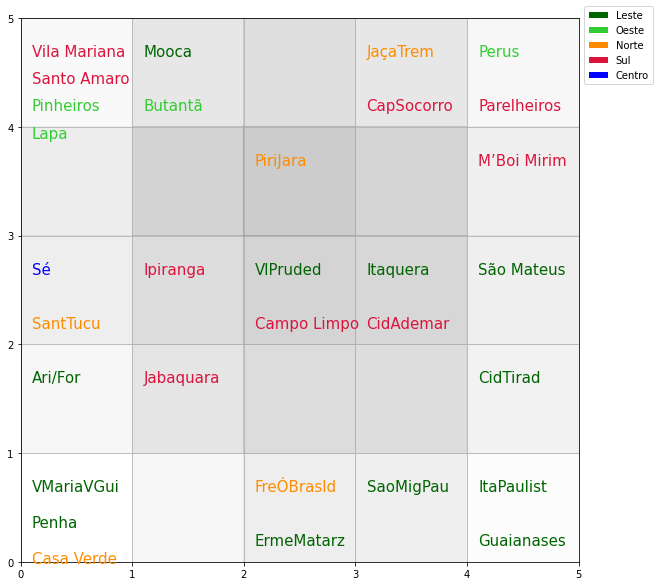

In [39]:
def shorten_Bairro(c):
    if len(c) > 12:
        return Bairro_codes[c]
    else:
        return c

Bairro_map = som.labels_map(X, democracy_index.Bairro)
    
plt.figure(figsize=(10, 10))
for p, Bairros in Bairro_map.items():
    Bairros = list(Bairros)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(Bairros):
        off_set = (i+1)/len(Bairros) - 0.05
        plt.text(x, y+off_set, shorten_Bairro(c), color=colors_dict[c], fontsize=15)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

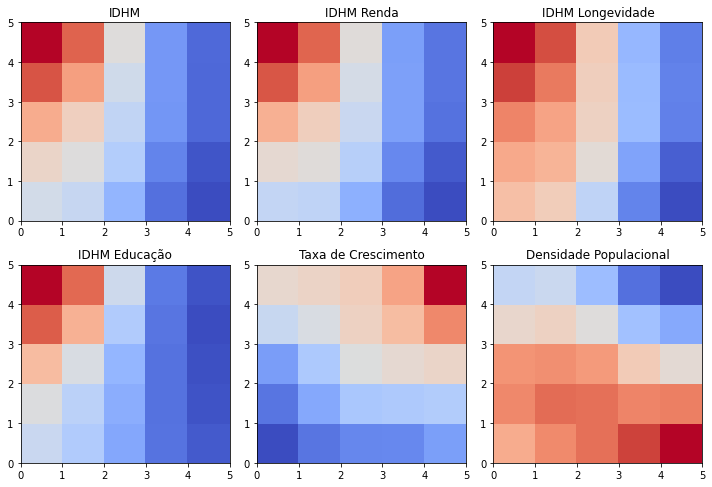

In [42]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

In [ ]:
Z = np.zeros((size, size))
plt.figure(figsize=(5, 5))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()